In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import pylab
import math
import random
import sklearn


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from pandas.api.types import is_numeric_dtype

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit


from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score
from math import sqrt

from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

In [3]:
df = pd.read_excel('Выборка.xlsx', sheet_name = 0)
df

,ID,Мусор,Агрегатор,LN(Цена),Цена,Цена_перв,Прогноз_1,Прогноз_2,Прогноз_3,MAE,...,Расположение на этаже,Срок сдачи,Выдача ключей,Отделка,Название новостройки,Тип участия,Название ЖК,Подъезд,Способ продажи,Вид сделки
0,1_этажи,0,этажи,15.955577,8500000,9500000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2_этажи,1,этажи,15.990262,8800000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3_этажи,0,этажи,15.747032,6900000,7100000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4_этажи,0,этажи,16.627921,16650000,16800000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5_этажи,0,этажи,15.894952,8000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8962,3807_фарпост,0,фарпост,17.370859,35000000,NaN,35000000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8963,3808_фарпост,0,фарпост,16.418200,13500000,NaN,13500000.0,1.333896e+07,1.327461e+07,225389.401821,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8964,3809_фарпост,0,фарпост,15.816991,7400000,NaN,7400000.0,8.182387e+06,8.286289e+06,-886288.617744,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8965,3810_фарпост,0,фарпост,16.001562,8900000,NaN,8900000.0,8.782008e+06,8.870232e+06,29767.603094,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_1 = df[df['Мусор'] == 0]
df_1 = df_1[df_1['dup_res'] == 0]
df_1 = df_1[df_1['Выброс_итог'] == 0]
#df_1 = df_1[df_1['LN(Цена)'] <= 17.5]
df_1.reset_index(drop = True, inplace = True)
df_1

,ID,Мусор,Агрегатор,LN(Цена),Цена,Цена_перв,Прогноз_1,Прогноз_2,Прогноз_3,MAE,...,Расположение на этаже,Срок сдачи,Выдача ключей,Отделка,Название новостройки,Тип участия,Название ЖК,Подъезд,Способ продажи,Вид сделки
0,33_этажи,0,этажи,15.039286,3400000,3600000.0,3.392260e+06,3.486955e+06,3.453675e+06,-53675.423670,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,58_этажи,0,этажи,15.869634,7800000,NaN,6.809348e+06,7.147859e+06,6.914744e+06,885255.864783,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,71_этажи,0,этажи,15.830414,7500000,NaN,6.552275e+06,6.508327e+06,6.688645e+06,811355.036468,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,85_этажи,0,этажи,15.640060,6200000,NaN,6.572362e+06,6.701578e+06,6.544720e+06,-344719.933613,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,105_этажи,0,этажи,15.444751,5100000,5150000.0,5.744776e+06,5.506107e+06,5.745738e+06,-645737.837714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4497,3806_фарпост,0,фарпост,15.656060,6300000,NaN,5.975461e+06,6.010550e+06,6.064623e+06,235377.016125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4498,3808_фарпост,0,фарпост,16.418200,13500000,NaN,1.350000e+07,1.333896e+07,1.327461e+07,225389.401821,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4499,3809_фарпост,0,фарпост,15.816991,7400000,NaN,7.400000e+06,8.182387e+06,8.286289e+06,-886288.617744,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4500,3810_фарпост,0,фарпост,16.001562,8900000,NaN,8.900000e+06,8.782008e+06,8.870232e+06,29767.603094,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_1['ГП_2'] = df_1['ГП_2'].astype(int) #обращаю внимание, что год постройки воспринимался как object

In [6]:
df_p = df_1[df_1['Район_2'] == 'Патрокл']
df_p

,ID,Мусор,Агрегатор,LN(Цена),Цена,Цена_перв,Прогноз_1,Прогноз_2,Прогноз_3,MAE,...,Расположение на этаже,Срок сдачи,Выдача ключей,Отделка,Название новостройки,Тип участия,Название ЖК,Подъезд,Способ продажи,Вид сделки
136,1769_этажи,0,этажи,15.978144,8694000,NaN,9.013320e+06,8.911715e+06,8.783968e+06,-8.996772e+04,...,Не угловая,Дом сдан,NaN,NaN,NaN,NaN,NaN,1 подъезд,NaN,NaN
137,1791_этажи,0,этажи,16.002011,8904000,NaN,9.240055e+06,9.099339e+06,9.049599e+06,-1.455988e+05,...,Не угловая,Дом сдан,NaN,NaN,NaN,NaN,NaN,2 подъезд,NaN,NaN
138,1836_этажи,0,этажи,16.063111,9465000,NaN,9.667423e+06,9.564446e+06,9.487661e+06,-2.266075e+04,...,Не угловая,Дом сдан,NaN,NaN,NaN,NaN,NaN,2 подъезд,NaN,NaN
139,1837_этажи,0,этажи,16.063111,9465000,NaN,9.633044e+06,9.564446e+06,9.487661e+06,-2.266075e+04,...,Не угловая,Дом сдан,NaN,NaN,NaN,NaN,NaN,2 подъезд,NaN,NaN
140,1839_этажи,0,этажи,16.063111,9465000,NaN,9.525784e+06,9.482546e+06,9.378794e+06,8.620585e+04,...,Не угловая,Дом сдан,NaN,NaN,NaN,NaN,NaN,2 подъезд,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4393,3684_фарпост,0,фарпост,15.995985,8850500,NaN,9.097178e+06,9.297340e+06,9.172879e+06,-3.223790e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4413,3706_фарпост,0,фарпост,16.549878,15400000,NaN,1.375815e+07,1.330237e+07,1.344012e+07,1.959883e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4431,3727_фарпост,0,фарпост,16.060334,9438750,NaN,1.012646e+07,1.013561e+07,1.009912e+07,-6.603695e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4446,3746_фарпост,0,фарпост,15.803385,7300000,NaN,7.749853e+06,7.472966e+06,7.559713e+06,-2.597127e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

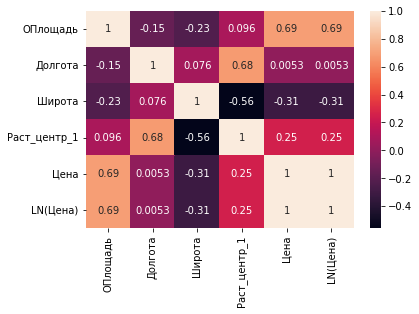

In [7]:
# Строим корреляционную матрицу
numeric_col = ['ОПлощадь', 
               'Долгота', 
               'Широта',
               'Раст_центр_1',
               'Цена',
               'LN(Цена)'
              ]
corr_matrix = df_p.loc[: , numeric_col].corr(method = "spearman") # pearson, kendall
sns.heatmap(corr_matrix, annot = True)

interval columns not set, guessing: ['Цена', 'LN(Цена)', 'Долгота', 'Широта', 'Раст_центр_1']


<AxesSubplot:>

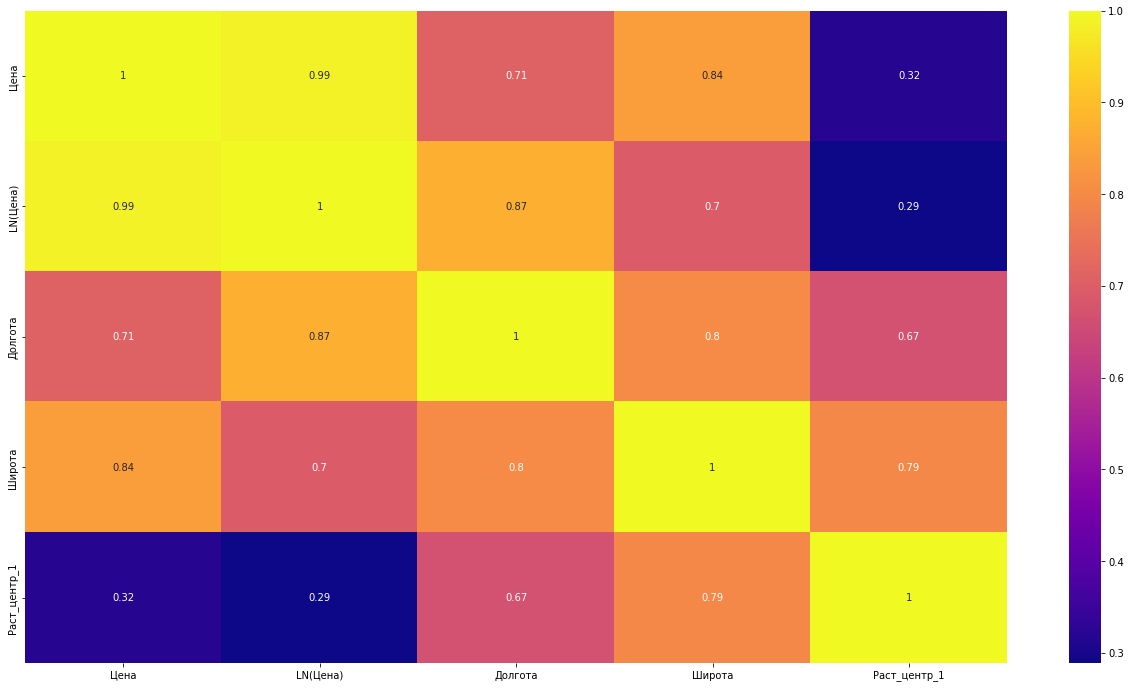

In [8]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

cmap = sns.color_palette("plasma", as_cmap = True)

phik_overview = df_p[['Цена', 'LN(Цена)', 'Долгота', 'Широта', 'Раст_центр_1']].phik_matrix()

plt.figure(figsize = (22, 12))
sns.heatmap(phik_overview, annot = True, cmap = cmap)

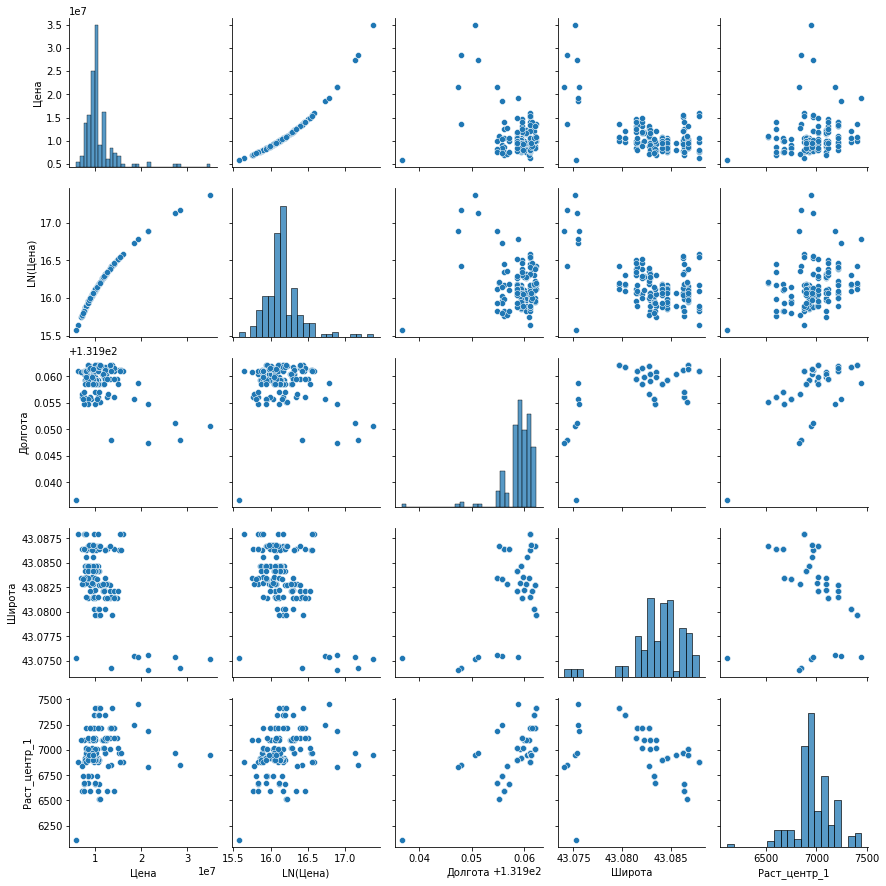

In [9]:
sns.pairplot(df_p[['Цена', 'LN(Цена)', 'Долгота', 'Широта', 'Раст_центр_1']])

In [57]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(df_1[['Этаж_3']]).toarray())

enc_df.columns = enc.get_feature_names() #см ниже
#enc_df
df_1 = df_1.join(enc_df)
df_1

,ID,Мусор,Агрегатор,LN(Цена),Цена,Цена_перв,Прогноз_1,Прогноз_2,MAE,MAPE,...,Название ЖК,Подъезд,Способ продажи,Вид сделки,x0_более 25,x0_первый,x0_последний,x0_этажи 11-25,x0_этажи 2-5,x0_этажи 6-10
0,33_этажи,0,этажи,15.039286,3400000,3600000.0,3.392260e+06,3.490272e+06,-9.027185e+04,-0.026551,...,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0
1,58_этажи,0,этажи,15.869634,7800000,NaN,6.809348e+06,7.078512e+06,7.214883e+05,0.092498,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0
2,71_этажи,0,этажи,15.830414,7500000,NaN,6.552275e+06,6.466749e+06,1.033251e+06,0.137767,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0
3,85_этажи,0,этажи,15.640060,6200000,NaN,6.572362e+06,6.658953e+06,-4.589525e+05,-0.074025,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0
4,105_этажи,0,этажи,15.444751,5100000,5150000.0,5.744776e+06,5.602486e+06,-5.024863e+05,-0.098527,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4499,3806_фарпост,0,фарпост,15.656060,6300000,NaN,5.975461e+06,6.119117e+06,1.808835e+05,0.028712,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0
4500,3808_фарпост,0,фарпост,16.418200,13500000,NaN,1.350000e+07,1.352066e+07,-2.065663e+04,-0.001530,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0
4501,3809_фарпост,0,фарпост,15.816991,7400000,NaN,7.400000e+06,8.511986e+06,-1.111986e+06,-0.150268,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0
4502,3810_фарпост,0,фарпост,16.001562,8900000,NaN,8.900000e+06,9.148907e+06,-2.489071e+05,-0.027967,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0


In [58]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(df_1[['Ремонт_3']]).toarray())

enc_df.columns = enc.get_feature_names() #см ниже
#enc_df
df_1 = df_1.join(enc_df)
df_1

,ID,Мусор,Агрегатор,LN(Цена),Цена,Цена_перв,Прогноз_1,Прогноз_2,MAE,MAPE,...,x0_последний,x0_этажи 11-25,x0_этажи 2-5,x0_этажи 6-10,x0_Без отделки,x0_Премиальный,x0_Премиальный+,x0_Стандартный,x0_Требует косметического ремонта,x0_Улучшенный
0,33_этажи,0,этажи,15.039286,3400000,3600000.0,3.392260e+06,3.490272e+06,-9.027185e+04,-0.026551,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,58_этажи,0,этажи,15.869634,7800000,NaN,6.809348e+06,7.078512e+06,7.214883e+05,0.092498,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,71_этажи,0,этажи,15.830414,7500000,NaN,6.552275e+06,6.466749e+06,1.033251e+06,0.137767,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,85_этажи,0,этажи,15.640060,6200000,NaN,6.572362e+06,6.658953e+06,-4.589525e+05,-0.074025,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,105_этажи,0,этажи,15.444751,5100000,5150000.0,5.744776e+06,5.602486e+06,-5.024863e+05,-0.098527,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4499,3806_фарпост,0,фарпост,15.656060,6300000,NaN,5.975461e+06,6.119117e+06,1.808835e+05,0.028712,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4500,3808_фарпост,0,фарпост,16.418200,13500000,NaN,1.350000e+07,1.352066e+07,-2.065663e+04,-0.001530,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4501,3809_фарпост,0,фарпост,15.816991,7400000,NaN,7.400000e+06,8.511986e+06,-1.111986e+06,-0.150268,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4502,3810_фарпост,0,фарпост,16.001562,8900000,NaN,8.900000e+06,9.148907e+06,-2.489071e+05,-0.027967,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [59]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(df_1[['Район_2']]).toarray())

enc_df.columns = enc.get_feature_names() #см ниже
#enc_df
df_1 = df_1.join(enc_df)
df_1

,ID,Мусор,Агрегатор,LN(Цена),Цена,Цена_перв,Прогноз_1,Прогноз_2,MAE,MAPE,...,x0_Снеговая Падь,x0_Столетие,x0_Тихая,x0_Толстого (Буссе),x0_Третья Рабочая,x0_Трудовая,x0_Трудовое_Весенняя_Пригород_Горонстай,x0_Центр,x0_Чуркин,x0_Эгершельд
0,33_этажи,0,этажи,15.039286,3400000,3600000.0,3.392260e+06,3.490272e+06,-9.027185e+04,-0.026551,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,58_этажи,0,этажи,15.869634,7800000,NaN,6.809348e+06,7.078512e+06,7.214883e+05,0.092498,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,71_этажи,0,этажи,15.830414,7500000,NaN,6.552275e+06,6.466749e+06,1.033251e+06,0.137767,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,85_этажи,0,этажи,15.640060,6200000,NaN,6.572362e+06,6.658953e+06,-4.589525e+05,-0.074025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,105_этажи,0,этажи,15.444751,5100000,5150000.0,5.744776e+06,5.602486e+06,-5.024863e+05,-0.098527,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4499,3806_фарпост,0,фарпост,15.656060,6300000,NaN,5.975461e+06,6.119117e+06,1.808835e+05,0.028712,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4500,3808_фарпост,0,фарпост,16.418200,13500000,NaN,1.350000e+07,1.352066e+07,-2.065663e+04,-0.001530,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4501,3809_фарпост,0,фарпост,15.816991,7400000,NaN,7.400000e+06,8.511986e+06,-1.111986e+06,-0.150268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4502,3810_фарпост,0,фарпост,16.001562,8900000,NaN,8.900000e+06,9.148907e+06,-2.489071e+05,-0.027967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df_1['Многоуровневая_En'] = encoder.fit_transform(df_1[['Многоуровневая']])
df_1['Терраса_En'] = encoder.fit_transform(df_1[['Терраса']])
#df['Витрины_En'] = encoder.fit_transform(df[['Витрины']])
df_1['ЖК_En'] = encoder.fit_transform(df_1[['ЖК']])
df_1['Вид_мбзп_En'] = encoder.fit_transform(df_1[['Вид_мбзп']])
#df['Вид_зр_En'] = encoder.fit_transform(df[['Вид_зр']])
df_1

/opt/conda/python37/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,ID,Мусор,Агрегатор,LN(Цена),Цена,Цена_перв,Прогноз_1,Прогноз_2,MAE,MAPE,...,x0_Третья Рабочая,x0_Трудовая,x0_Трудовое_Весенняя_Пригород_Горонстай,x0_Центр,x0_Чуркин,x0_Эгершельд,Многоуровневая_En,Терраса_En,ЖК_En,Вид_мбзп_En
0,33_этажи,0,этажи,15.039286,3400000,3600000.0,3.392260e+06,3.490272e+06,-9.027185e+04,-0.026551,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,1
1,58_этажи,0,этажи,15.869634,7800000,NaN,6.809348e+06,7.078512e+06,7.214883e+05,0.092498,...,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0,1
2,71_этажи,0,этажи,15.830414,7500000,NaN,6.552275e+06,6.466749e+06,1.033251e+06,0.137767,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,1
3,85_этажи,0,этажи,15.640060,6200000,NaN,6.572362e+06,6.658953e+06,-4.589525e+05,-0.074025,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,1
4,105_этажи,0,этажи,15.444751,5100000,5150000.0,5.744776e+06,5.602486e+06,-5.024863e+05,-0.098527,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4499,3806_фарпост,0,фарпост,15.656060,6300000,NaN,5.975461e+06,6.119117e+06,1.808835e+05,0.028712,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,1
4500,3808_фарпост,0,фарпост,16.418200,13500000,NaN,1.350000e+07,1.352066e+07,-2.065663e+04,-0.001530,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,1
4501,3809_фарпост,0,фарпост,15.816991,7400000,NaN,7.400000e+06,8.511986e+06,-1.111986e+06,-0.150268,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,1
4502,3810_фарпост,0,фарпост,16.001562,8900000,NaN,8.900000e+06,9.148907e+06,-2.489071e+05,-0.027967,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,1


In [61]:
list(df_1.columns)

['ID',
 'Мусор',
 'Агрегатор',
 'LN(Цена)',
 'Цена',
 'Цена_перв',
 'Прогноз_1',
 'Прогноз_2',
 'MAE',
 'MAPE',
 'Цена(кв.м)_пр',
 'Исп',
 'Комм',
 'Цена(кв.м)',
 'Выброс_итог',
 'Выброс_1',
 'Комм.1',
 'PC_1',
 'PC_2',
 'TSNE_1',
 'TSNE_2',
 'IsolationForest_pca',
 'OneClassSVM_pca',
 'IsolationForest',
 'OneClassSVM',
 'Выброс_3',
 'Комм.2',
 'Исп.1',
 'dup_all',
 'dup_1',
 'dup_2',
 'dup(<=0.03)',
 'Пересечения(<=0.03)',
 'Пересечения(>=0.03)',
 'dup_res',
 'КН_гис',
 'ОПлощадь',
 'Оплощадь_перв',
 'Комнатность_1',
 'Комнатность_перв',
 'Этаж_1',
 'Этаж_1_в',
 'Этаж_2',
 'Этаж_3',
 'Этаж_4',
 'Этажность_1',
 'Этажность_2',
 'Неточность',
 'Этажность_гис',
 'Этажность_мин',
 'Этажность_прдом',
 'разница',
 'разница.1',
 'Этаж/Этажность',
 'ГП_2',
 'Неточность.1',
 'ГП_1',
 'ГП_гис',
 'ГП_мин',
 'Проверка',
 'ГП_прдом',
 'разница.2',
 'ГП_перв',
 'Ремонт_1',
 'Cluster_1',
 'Cluster_2',
 'Ремонт_2',
 'Ремонт_3',
 'Ремонт_1_в',
 'Неточность.2',
 'Число_р',
 'Ремонт_перв',
 'Стены_2',
 '

# SVR

In [62]:
X = df_1[[
         'ОПлощадь',
         #'Этаж_1',
         'Этажность_1',
         'ГП_2',
         'Раст_центр_1',
         'Долгота',
         'Широта',
         'x0_более 25',
         'x0_первый',
         'x0_последний',
         'x0_этажи 11-25',
         'x0_этажи 2-5',
         'x0_этажи 6-10',
         'x0_Без отделки',
         'x0_Премиальный',
         'x0_Премиальный+',
         'x0_Стандартный',
         'x0_Требует косметического ремонта',
         'x0_Улучшенный',
         'x0_64, 71_Фадеева',
         'x0_БАМ',
         'x0_Баляева_Снеговая',
         'x0_Борисенко',
         'x0_Вторая Речка',
         'x0_Гайдамак',
         'x0_Заря',
         'x0_Луговая',
         'x0_Некрасовская',
         'x0_Океанская_СахКлюч_Спутник_ЧерРечка',
         'x0_Патрокл',
         'x0_Первая речка',
         'x0_Садгород',
         'x0_Санаторная',
         'x0_Седанка_Чайка',
         'x0_Снеговая Падь',
         'x0_Столетие',
         'x0_Тихая',
         'x0_Толстого (Буссе)',
         'x0_Третья Рабочая',
         'x0_Трудовая',
         'x0_Трудовое_Весенняя_Пригород_Горонстай',
         'x0_Центр',
         'x0_Чуркин',
         'x0_Эгершельд',
         'Многоуровневая_En',
         'Терраса_En',
         'ЖК_En',
         'Вид_мбзп_En'
      ]]

Y = df_1['LN(Цена)']

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.10, random_state = 0)

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

MAE на обучении: 773694.2884
RMSE на обучении: 1105769.6708
MAPE на обучении: 0.0819
R2 на обучении: 0.968
MAE на тесте: 875022.5992
RMSE на тесте: 1335261.0862
MAPE на тесте: 0.0926
R2 на тесте: 0.9408


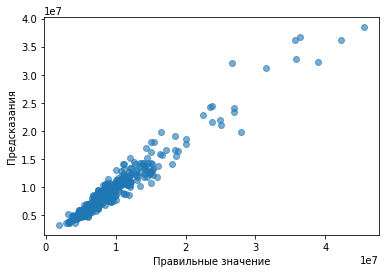

In [44]:
svr = SVR(kernel = 'rbf', C = 2, gamma = 'auto', epsilon = 0.1)
svr.fit(X_train_sc, Y_train)

# pred_1 = np.exp(svr.predict(X))

pred_train = np.exp(svr.predict(X_train_sc))
mse_train = mse(np.exp(Y_train), pred_train)
print("MAE на обучении:", round(mae(np.exp(Y_train), pred_train), 4))
print("RMSE на обучении:", round(sqrt(mse(np.exp(Y_train), pred_train)), 4))
print("MAPE на обучении:", round(mape(np.exp(Y_train), pred_train), 4))
print("R2 на обучении:", round(r2_score(np.exp(Y_train), pred_train), 4))
print("===============================")

pred_test = np.exp(svr.predict(X_test_sc))
mse_test = mse(np.exp(Y_test), pred_test)
print("MAE на тесте:", round(mae(np.exp(Y_test), pred_test), 4))
print("RMSE на тесте:", round(sqrt(mse(np.exp(Y_test), pred_test)), 4))
print("MAPE на тесте:", round(mape(np.exp(Y_test), pred_test), 4))
print("R2 на тесте:", round(r2_score(np.exp(Y_test), pred_test), 4))
print("===============================")

# print("MAE:", round(mae(np.exp(Y), pred_1), 4))
# print("RMSE:", round(sqrt(mse(np.exp(Y), pred_1)), 4))
# print("MAPE:", round(mape(np.exp(Y), pred_1), 4))
# print("R2:", round(r2_score(np.exp(Y), pred_1), 4))

plt.scatter(np.exp(Y_test), pred_test, alpha = 0.6)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()

# CatBoost

In [45]:
X = df_1[[
        'ОПлощадь',
        #'Этаж_1',
        'Этаж_3',
        #'Этаж_4',
        'Этажность_1',
        #'Этажность_2',
        'ГП_2',
        #'Ремонт_2',
        'Ремонт_3',
        'Долгота',
        'Широта',
        #'Просмотры_1',
        'Раст_центр_1',
        #'Раст_центр_2',
        #'Cluster_2',
        'Район_2',
        'Многоуровневая',
        'Терраса',
        #'Витрины',
        'ЖК',
        'Вид_мбзп',
        #'Вид_зр'
      ]]

Y = df_1['LN(Цена)']

def get_categorical_indicies(X):
    cats = []
    for col in X.columns:
        if is_numeric_dtype(X[col]):
            pass
        else:
            cats.append(col)
    cat_indicies = []
    for col in cats:
        cat_indicies.append(X.columns.get_loc(col))
    return cat_indicies

cat_features = get_categorical_indicies(X)
print(cat_features)

[1, 4, 8, 9, 10, 11, 12]


In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.10, random_state = 0)
#X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size = 0.67, random_state = 42)
#test_size = 0.10 согласно learning_curve

In [47]:
print(len(X_train))
print(len(X_test))
#print(len(X_val))

4053
451


MAE на обучении: 846536.2392
RMSE на обучении: 1399619.8187
MAPE на обучении: 0.0853
R2 на обучении: 0.9488
MAE на тесте: 841727.4023
RMSE на тесте: 1287514.2568
MAPE на тесте: 0.0873
R2 на тесте: 0.945
MAE: 846054.7149
RMSE: 1388802.0879
MAPE: 0.0855
R2: 0.9485


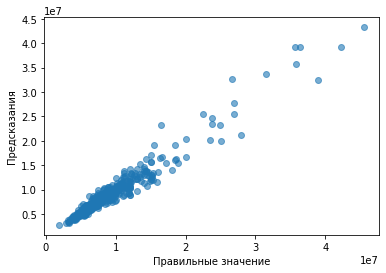

In [51]:
catb = CatBoostRegressor(iterations = 500, #максимальное количество построенных деревьев
                         random_seed = 6, 
                         learning_rate = 0.03, #скорость обучения, определяет насколько быстро или медленно модель будет учиться
                         max_depth = 4, #глубина дерева
                         #boosting_type = 'Ordered', #может дать хорошее качество при малых выборках, работает медленно
                         #l2_leaf_reg = 100, #коэффициент при члене регуляризации L2 функции потерь
                         #bagging_temperature = 1,
                         #random_strength = 1,
                         one_hot_max_size = 30, #не используем one hot encoding, а включаем one_hot_max_size
                         #loss_function = 'MAE', #по умолчанию
                         #eval_metric = 'MAPE', #MAPE
                         od_type = 'Iter', #если модель переобучилась
                         od_wait = 20
                        ) #делай остановку через 20 итераций
#если хотим хорошее качество, то уменьшаем learning_rate и увеличиваем iterations.
#если модель слишком рано переобучается, то l2_leaf_reg увеличиваем.

#cat_features = [6, 7, 8, 9, 10, 11]

catb.fit(X_train, Y_train, 
         cat_features = cat_features, #массив с индексами категориальных фичей
         eval_set = (X_test, Y_test),
         verbose = False, 
         #plot = True
        ) #включение графика

#Ypred = catb.predict(X_test)

pred_1 = np.exp(catb.predict(X))

pred_train = np.exp(catb.predict(X_train))
mse_train = mse(np.exp(Y_train), pred_train)
print("MAE на обучении:", round(mae(np.exp(Y_train), pred_train), 4))
print("RMSE на обучении:", round(sqrt(mse(np.exp(Y_train), pred_train)), 4))
print("MAPE на обучении:", round(mape(np.exp(Y_train), pred_train), 4))
print("R2 на обучении:", round(r2_score(np.exp(Y_train), pred_train), 4))
print("===============================")

pred_test = np.exp(catb.predict(X_test))
mse_test = mse(np.exp(Y_test), pred_test)
print("MAE на тесте:", round(mae(np.exp(Y_test), pred_test), 4))
print("RMSE на тесте:", round(sqrt(mse(np.exp(Y_test), pred_test)), 4))
print("MAPE на тесте:", round(mape(np.exp(Y_test), pred_test), 4))
print("R2 на тесте:", round(r2_score(np.exp(Y_test), pred_test), 4))
print("===============================")

print("MAE:", round(mae(np.exp(Y), pred_1), 4))
print("RMSE:", round(sqrt(mse(np.exp(Y), pred_1)), 4))
print("MAPE:", round(mape(np.exp(Y), pred_1), 4))
print("R2:", round(r2_score(np.exp(Y), pred_1), 4))

plt.scatter(np.exp(Y_test), pred_test, alpha = 0.6)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()

# RandomForest

MAE на обучении: 974874.0659
RMSE на обучении: 1540480.2805
MAPE на обучении: 0.0996
R2 на обучении: 0.9379
MAE на тесте: 1072852.2632
RMSE на тесте: 1729427.9214
MAPE на тесте: 0.1081
R2 на тесте: 0.9008


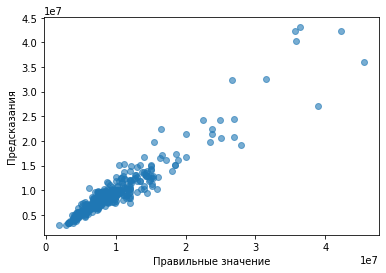

In [89]:
rf = RandomForestRegressor(n_estimators = 500, max_depth = 7, max_features = 47, min_samples_split = 2, min_samples_leaf = 1, random_state = 0)
rf.fit(X_train_sc, Y_train)

# pred_1 = np.exp(svr.predict(X))

pred_train = np.exp(rf.predict(X_train_sc))
mse_train = mse(np.exp(Y_train), pred_train)
print("MAE на обучении:", round(mae(np.exp(Y_train), pred_train), 4))
print("RMSE на обучении:", round(sqrt(mse(np.exp(Y_train), pred_train)), 4))
print("MAPE на обучении:", round(mape(np.exp(Y_train), pred_train), 4))
print("R2 на обучении:", round(r2_score(np.exp(Y_train), pred_train), 4))
print("===============================")

pred_test = np.exp(rf.predict(X_test_sc))
mse_test = mse(np.exp(Y_test), pred_test)
print("MAE на тесте:", round(mae(np.exp(Y_test), pred_test), 4))
print("RMSE на тесте:", round(sqrt(mse(np.exp(Y_test), pred_test)), 4))
print("MAPE на тесте:", round(mape(np.exp(Y_test), pred_test), 4))
print("R2 на тесте:", round(r2_score(np.exp(Y_test), pred_test), 4))
print("===============================")

plt.scatter(np.exp(Y_test), pred_test, alpha = 0.6)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()

# Voting Regressor

In [90]:
svr = SVR(kernel = 'rbf', C = 2, gamma = 'auto', epsilon = 0.1)
rf = RandomForestRegressor(n_estimators = 500, max_depth = 7, max_features = 47, min_samples_split = 2, min_samples_leaf = 1, random_state = 0)
catb = CatBoostRegressor(iterations = 500, #максимальное количество построенных деревьев
                         random_seed = 6, 
                         learning_rate = 0.03, #скорость обучения, определяет насколько быстро или медленно модель будет учиться
                         max_depth = 4, #глубина дерева
                         #boosting_type = 'Ordered', #может дать хорошее качество при малых выборках, работает медленно
                         #l2_leaf_reg = 100, #коэффициент при члене регуляризации L2 функции потерь
                         #bagging_temperature = 1,
                         #random_strength = 1,
                         one_hot_max_size = 30, #не используем one hot encoding, а включаем one_hot_max_size
                         #loss_function = 'MAE', #по умолчанию
                         #eval_metric = 'MAPE', #MAPE
                         od_type = 'Iter', #если модель переобучилась
                         od_wait = 20
                        )

0:	learn: 0.4568059	total: 453ms	remaining: 3m 45s
1:	learn: 0.4473702	total: 850ms	remaining: 3m 31s
2:	learn: 0.4384771	total: 963ms	remaining: 2m 39s
3:	learn: 0.4306092	total: 1.45s	remaining: 2m 59s
4:	learn: 0.4220331	total: 2.04s	remaining: 3m 22s
5:	learn: 0.4137730	total: 2.54s	remaining: 3m 29s
6:	learn: 0.4055635	total: 2.94s	remaining: 3m 27s
7:	learn: 0.3982585	total: 3.14s	remaining: 3m 13s
8:	learn: 0.3905996	total: 3.64s	remaining: 3m 18s
9:	learn: 0.3833596	total: 4.14s	remaining: 3m 22s
10:	learn: 0.3763867	total: 4.74s	remaining: 3m 30s
11:	learn: 0.3697762	total: 5.53s	remaining: 3m 45s
12:	learn: 0.3630725	total: 6.14s	remaining: 3m 49s
13:	learn: 0.3567276	total: 6.63s	remaining: 3m 50s
14:	learn: 0.3503650	total: 6.93s	remaining: 3m 44s
15:	learn: 0.3443767	total: 7.52s	remaining: 3m 47s
16:	learn: 0.3388850	total: 8.17s	remaining: 3m 52s
17:	learn: 0.3331708	total: 8.62s	remaining: 3m 50s
18:	learn: 0.3280508	total: 9.42s	remaining: 3m 58s
19:	learn: 0.3226097	t

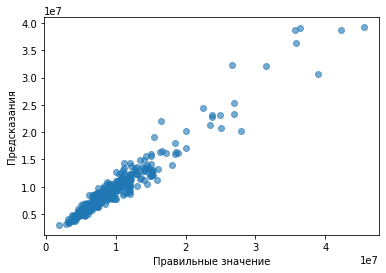

In [91]:
from sklearn.ensemble import VotingRegressor

voting_reg = VotingRegressor(estimators = [('svr', svr), ('catb', catb), ('rf', rf)])
voting_reg.fit(X_train_sc, Y_train)

pred_train = np.exp(voting_reg.predict(X_train_sc))
mse_train = mse(np.exp(Y_train), pred_train)
print("MAE на обучении:", round(mae(np.exp(Y_train), pred_train), 4))
print("RMSE на обучении:", round(sqrt(mse(np.exp(Y_train), pred_train)), 4))
print("MAPE на обучении:", round(mape(np.exp(Y_train), pred_train), 4))
print("R2 на обучении:", round(r2_score(np.exp(Y_train), pred_train), 4))
print("===============================")

pred_test = np.exp(voting_reg.predict(X_test_sc))
mse_test = mse(np.exp(Y_test), pred_test)
print("MAE на тесте:", round(mae(np.exp(Y_test), pred_test), 4))
print("RMSE на тесте:", round(sqrt(mse(np.exp(Y_test), pred_test)), 4))
print("MAPE на тесте:", round(mape(np.exp(Y_test), pred_test), 4))
print("R2 на тесте:", round(r2_score(np.exp(Y_test), pred_test), 4))
print("===============================")

plt.scatter(np.exp(Y_test), pred_test, alpha = 0.6)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()

In [ ]:
MAE на обучении: 773694.2884
RMSE на обучении: 1105769.6708
MAPE на обучении: 0.0819
R2 на обучении: 0.968
===============================
MAE на тесте: 875022.5992
RMSE на тесте: 1335261.0862
MAPE на тесте: 0.0926
R2 на тесте: 0.9408
===============================

In [ ]:
MAE на обучении: 846536.2392
RMSE на обучении: 1399619.8187
MAPE на обучении: 0.0853
R2 на обучении: 0.9488
===============================
MAE на тесте: 841727.4023
RMSE на тесте: 1287514.2568
MAPE на тесте: 0.0873
R2 на тесте: 0.945
===============================

In [ ]:
MAE на обучении: 766102.0253
RMSE на обучении: 1192141.2498
MAPE на обучении: 0.079
R2 на обучении: 0.9628
===============================
MAE на тесте: 820082.438
RMSE на тесте: 1249478.3841
MAPE на тесте: 0.0858
R2 на тесте: 0.9482
===============================

In [ ]:
MAE на обучении: 786645.9672
RMSE на обучении: 1247224.18
MAPE на обучении: 0.0808
R2 на обучении: 0.9593
===============================
MAE на тесте: 853536.4243
RMSE на тесте: 1338062.9133
MAPE на тесте: 0.0876
R2 на тесте: 0.9406
===============================